<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors

_Authors: Bryce Peake + Alex Sherman (DC)_

In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. 

In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report as cr

from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
#import "Classified Data", set the index_col to 0
df = pd.read_csv("data/Classified Data",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Use a logistic Regression to predict our Target Class

In [6]:
X = df.drop('TARGET CLASS', axis = 1)
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [7]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

In [8]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       116
           1       0.95      0.96      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



## K-Nearest Neighbors (KNN) Classification

---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

kNN is a **non-parametric model**, meaning it is non-linear. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).
<br>

<a id="k-nearest-neighbors-knn-classification"></a>

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown Target Class.

<img src="assets/k-nearest-neighborss.jpg">

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

In [ ]:
#Models using Euclid

## SCALE
## SPLIT
## INSTANTIATE
## FIT
## PREDICT
## SCORE

In [9]:
#We use a scaler from sklearn
##Instantiate
scaler = StandardScaler() # we always use standard scaler for problems dealing with Euclidian distance, i.e., mean. = 0, sd  = 1

#fit + transform
scaled_features = scaler.fit_transform(df.drop("TARGET CLASS", axis = 1))

In [10]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [4]:
#append the new column to the df
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.278977e-16,-2.966516e-16,-1.079137e-16,-1.705303e-16,-6.075140e-16,2.842171e-17,6.625811e-16,-4.805045e-16,3.286260e-16,4.556355e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


## Train Test Split

In [13]:
# # steps to do (review .... LogReg)... follow steps 
# # import
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# # instantiate
# clf = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 9)

In [38]:
# #fit 
from sklearn.model_selection import train_test_split
# df.columns
# X = df.drop(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], axis = 1)
# y = df["TARGET CLASS"]

# X_train, X_test, y_train, y_test = tts(X, y, random_state = 42)
# clf.fit(X_train, y_train)


# it's much better to scale after splitting the dataset, so the following code needs to be adjusted to use 'features' first and then scale
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], random_state = 42)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [39]:
# #predict
# y_pred = clf.predict(X_test)
y_pred = knn.predict(X_test)

In [40]:
# #score model
# # clf.score(X_test, y_test)
# from sklearn.metrics import classification_report as cr
# print(cr(y_test, y_pred))
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       116
           1       0.93      0.96      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [41]:
df['PREDICTIONS'] = knn.predict(scaled_features)
df['PREDICTION_PROBA'] = knn.predict_proba(scaled_features)[:,1]

(array([391.,  36.,  33.,  58.,  26.,  42., 414.]),
 array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]),
 <a list of 7 Patch objects>)

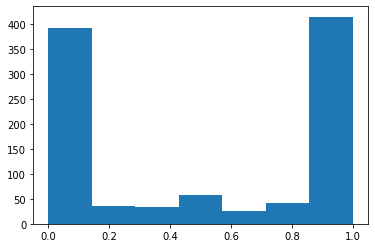

In [42]:
plt.hist(df.PREDICTION_PROBA, bins = 'scott')

In [39]:
#BRYCE'S VERSION

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df["TARGET CLASS"],
                                                   test_size = .3, random_state = 42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(scaled_X_train, y_train)
y_pred = knn.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
import new data as new_data
scaled_new_data = scaler.transform(new_data)
new_data['prediction'] = knn.predict(scaled_new_data)


## Using kNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k = 1.

In [43]:
#Import 
from sklearn.neighbors import KNeighborsClassifier

#Instantiate
knn = KNeighborsClassifier(n_neighbors = 1)

#Fit
knn.fit(X_train, y_train)

#predict
pred = knn.predict(X_test)

In [44]:
#Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[108   8]
 [  8 126]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       116
           1       0.94      0.94      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



## Choosing a K value
How do we make sure we can choose a good K value?

In [45]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

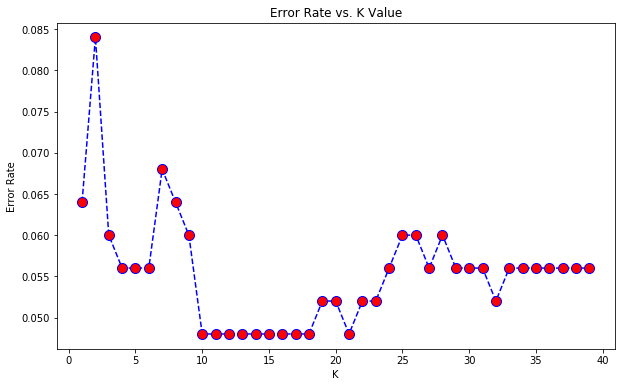

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn()

In [57]:
#... seems like a lot of work... why not...
from sklearn.model_selection import GridSearchCV

k = np.arange(40) + 1
knn = KNeighborsClassifier()

params = {'n_neighbors': k, 'leaf_size': range(1, 7), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']}

#Note! cross-validation(CV) should be no more than 25% of the data!
gs = GridSearchCV(estimator= knn,
                  param_grid= params,
                  cv=5)

gs.fit(X_train, y_train)

#Check the documentation! How do you get only the best k? 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': range(1, 7),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
# we can also use the new feature: gs.best_model
gs.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 28,
 'weights': 'uniform'}

In [60]:
#Now with K = ?
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 1, n_neighbors = 28, weights = 'uniform', n_jobs = -1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[109   7]
 [  8 126]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       116
           1       0.95      0.94      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [50]:
gs.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1])

In [38]:
y_pred_new = gs.predict(X_test)
print(claassification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# #GA version
# 1. Scale our data to the whole set
# 2. predict things
# 3.  deploy/implement model, hop scater works on everything

# #BP version
# 1. train/test split
# 2. Instantiate/fit scaler on training data
# 3. Tansform test data with scaler
# 4.  deploy/implement model, hop scater works on everything

In [55]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS,PREDICTIONS,PREDICTION_PROBA
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1,1,1.000000
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0,0,0.333333
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0,0,0.111111
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1,1,0.777778
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1,1,1.000000
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0,0,0.333333
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1,1,1.000000
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1,1,1.000000


In [61]:
X = df.drop(columns = ['TARGET CLASS', 'PREDICTIONS', 'PREDICTION_PROBA'])
y = df['TARGET CLASS']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=28, p=2,
                     weights='uniform')

In [68]:
y_pred = knn.predict(X_test_scaled)

In [69]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       125
           1       0.91      0.91      0.91       125

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

